# Setup

In [2]:
%load_ext autoreload
%autoreload 2
from IPython.core.interactiveshell import InteractiveShell;InteractiveShell.ast_node_interactivity = "all"

import sys
import requests

import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import FormatStrFormatter

from velib.data import Velib
from velib.map import StationMap

In [3]:
df = pd.read_csv('../Data/2021 10 25 30m.csv')
df.datetime = (pd.to_datetime(df.datetime, format = "%Y-%m-%d %H-%M"))
df = df[df.datetime > np.datetime64('2021-10-15 00:15:00')]
df.shape, df.datetime.min(), df.datetime.max()
df["total"] = df.elec + df.meca + df.park
df["proportion"] = (df.elec + df.meca)/df.total * 100; df.sample(3)

((734121, 5),
 Timestamp('2021-10-15 06:00:00'),
 Timestamp('2021-10-25 23:00:00'))

,datetime,stationCode,meca,elec,park,total,proportion
294771,2021-10-19 12:30:00,32020,5,0,9,14,35.714286
430628,2021-10-21 12:00:00,33014,1,0,18,19,5.263158
23378,2021-10-15 14:00:00,14122,0,0,18,18,0.000000


# Distribution des moyennes

In [113]:
df_means = df.groupby("stationCode").mean();df_means.sample(3)
# df_means = df_means.query('total != 0')

,meca,elec,park,total,proportion
stationCode,,,,,
6007,2.072266,1.679688,19.253906,23.005859,16.356659
19026,1.119141,2.355469,13.035156,16.509766,21.095904
14127,3.931641,1.814453,30.580078,36.326172,16.661607


In [114]:
params = {
    "total": {
        "title": "Capacité totale",
        "binwidth": 10,
        "color": 'lightgray',
        "ylim": [0.9, 1200]
    },
    "park": {
        "title": "Places disponibles",
        "binwidth": 10,
        "color": 'mediumorchid',
        "ylim": [0.9, 1200]
    },
    "meca": {
        "title": "Vélos mécaniques",
        "binwidth": 5,
        "color": 'forestgreen',
        "ylim": [0.9, 1200]
    },
    "elec": {
        "title": "Vélos électriques",
        "binwidth": 1,
        "color": 'steelblue',
        "ylim": [0.9, 1200]
    },
    "proportion": {
        "title": "Proportion d'occupation",
        "binwidth": 10,
        "color": 'gold',
        "ylim": [0.9, 1200]
    },
}

In [115]:
def format_log_hist(ax, series, **kwargs):
    sns.histplot(series, kde=False, binwidth = kwargs['binwidth'], ax = ax, color = kwargs['color']);
    ax.set_yscale('log');
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'));
    ax.grid(axis = 'y', linestyle = ':')
    for p in ax.patches:
        label =f'{p.get_height()}'
        width, height =p.get_width(),p.get_height()
        x = p.get_x() + 0.5 * width
        y = p.get_height() + 0.5 * height
        ax.annotate(label,(x,y), va = 'center', ha = 'center');
        ax.spines[['top', 'right']].set_visible(False)
    ax.set_ylim(kwargs['ylim']);
    ax.set_title(kwargs['title'])
    ax.set_xlabel('')
    ax.set_ylabel('')

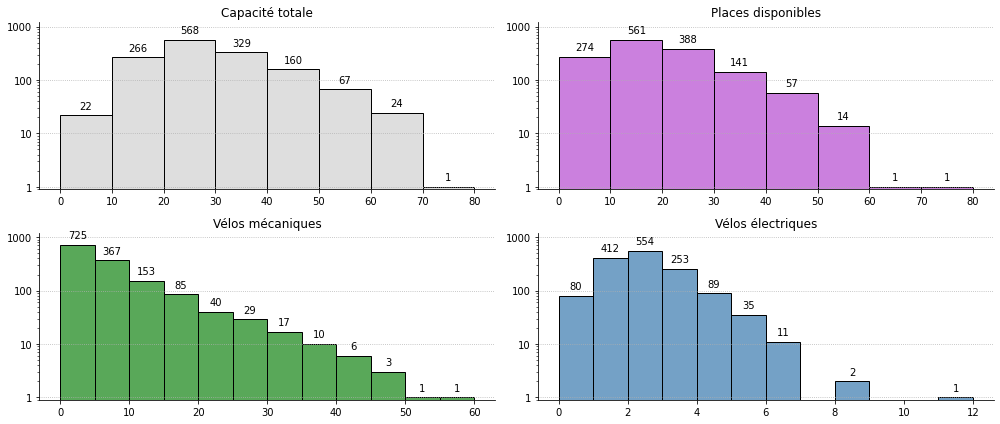

In [116]:
fig,axs = plt.subplots(2,2,figsize = (14,6))
ax1, ax2, ax3, ax4 = axs.flat
format_log_hist(ax1, df_means.total, **params["total"])
format_log_hist(ax2, df_means.park, **params["park"])
format_log_hist(ax3, df_means.meca, **params["meca"])
format_log_hist(ax4, df_means.elec, **params["elec"])
fig.tight_layout()
    

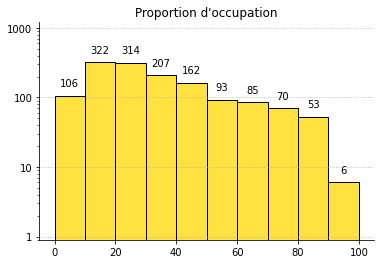

In [117]:
ax = plt.subplot()
format_log_hist(ax, df_means.proportion, **params["proportion"])

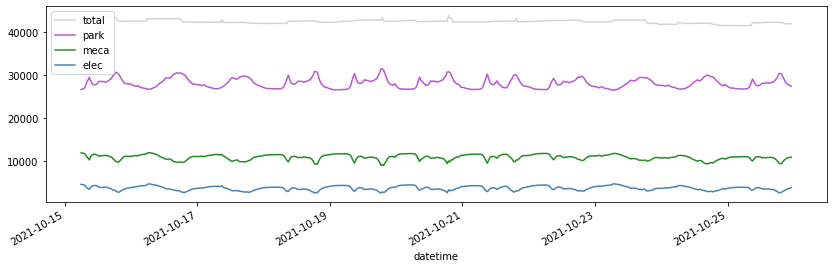

In [118]:
df.groupby("datetime").sum()[["total", "park", "meca", "elec",]].plot(figsize = (14,4), color = ['lightgray', 'mediumorchid', 'forestgreen', 'steelblue']);

# Home subset

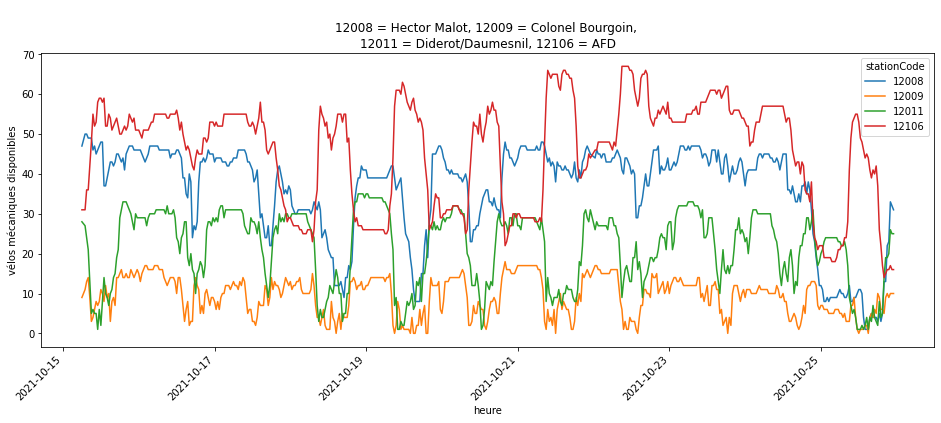

In [119]:
df_home = df[df.stationCode.isin([12008, 12009, 12106, 12011,])]
fig = plt.figure(figsize = (16, 6))
ax = plt.subplot()
df_home.pivot_table(
    values="meca", 
    index="datetime", 
    columns="stationCode").plot(xlabel = "heure", 
                                ylabel = 'vélos mécaniques disponibles', 
                                ax = ax,
                                title = """
12008 = Hector Malot, 12009 = Colonel Bourgoin, 
12011 = Diderot/Daumesnil, 12106 = AFD""");
ax = plt.gca()
plt.setp(ax.get_xticklabels(), ha="right", rotation=45);

plt.savefig("Velib01.png");

# Random choices

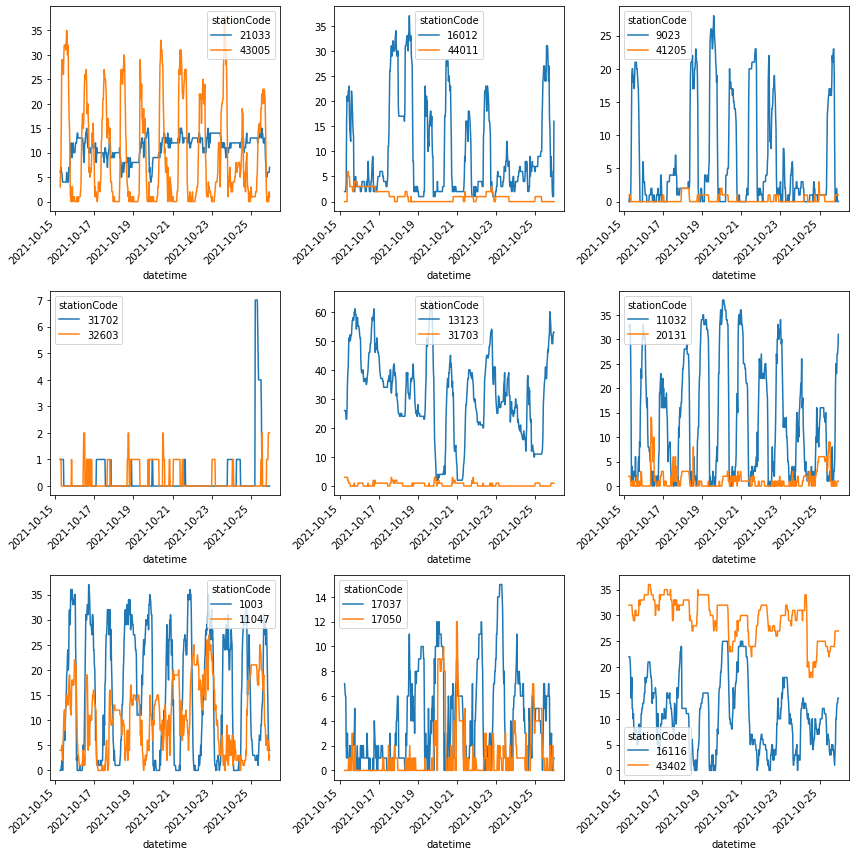

In [120]:
fig, axs = plt.subplots(3,3, figsize = (12, 12))
for ax in axs.flat:
    random_list = df.sample(2).stationCode.tolist() 
    (df[df.stationCode.isin(random_list)]
                .pivot_table(
                    values="meca", 
                    index="datetime", 
                    columns="stationCode")
                .plot(ax = ax,))
    plt.setp(ax.get_xticklabels(), ha="right", rotation=45);
fig.tight_layout();
# plt.savefig("Velib_random02.png");

# Big stations 

In [146]:
df_max = df.groupby("stationCode").max()[["total"]]
big_list = list(df_max.sort_values(by='total', ascending = False).index[:30])
big_list
df.head()

[8004,
 13123,
 15030,
 15028,
 12106,
 12157,
 5034,
 19045,
 1013,
 16025,
 12040,
 12108,
 15012,
 12033,
 15003,
 16124,
 7007,
 12105,
 7010,
 6026,
 8017,
 15059,
 15104,
 15021,
 11007,
 7009,
 13118,
 15038,
 5015,
 15008]

,datetime,stationCode,meca,elec,park,total,proportion
1432,2021-10-15 06:00:00,16107,2,4,28,34,17.647059
1433,2021-10-15 06:00:00,11104,8,2,9,19,52.631579
1434,2021-10-15 06:00:00,9020,1,1,19,21,9.523810
1435,2021-10-15 06:00:00,12109,24,3,1,28,96.428571
1436,2021-10-15 06:00:00,5001,0,0,43,43,0.000000


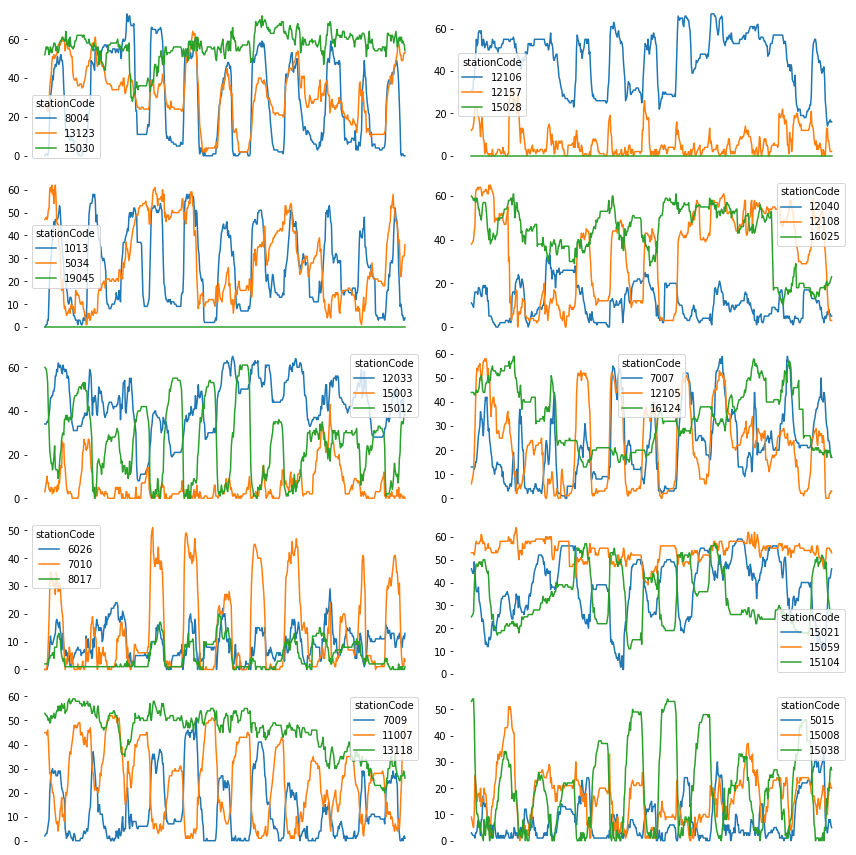

In [147]:
fig, axs = plt.subplots(5,2, figsize = (12, 12))
for i, ax in enumerate(axs.flat):
    (df[df.stationCode.isin(big_list[3*i:3*i+3])]
                .pivot_table(
                    values="meca", 
                    index="datetime", 
                    columns="stationCode")
                .plot(ax = ax,));
    plt.setp(ax.get_xticklabels(), ha="right", rotation=45);
    ax.spines[['top', 'left', 'bottom', 'right']].set_visible(False)
    ax.set_xlabel('')
    ax.set_xticks([])
fig.tight_layout();
# plt.savefig("Velib_random02.png");

In [198]:
map_ = StationMap()

In [199]:
map_.marker(big_list)

In [200]:
map_.show()

##### df_week = df[df.datetime.dt.weekday <5] # jours de la semaine
df_week['hour'] = df_week.datetime.dt.hour # colonne heure

NameError: name 'random_list' is not defined

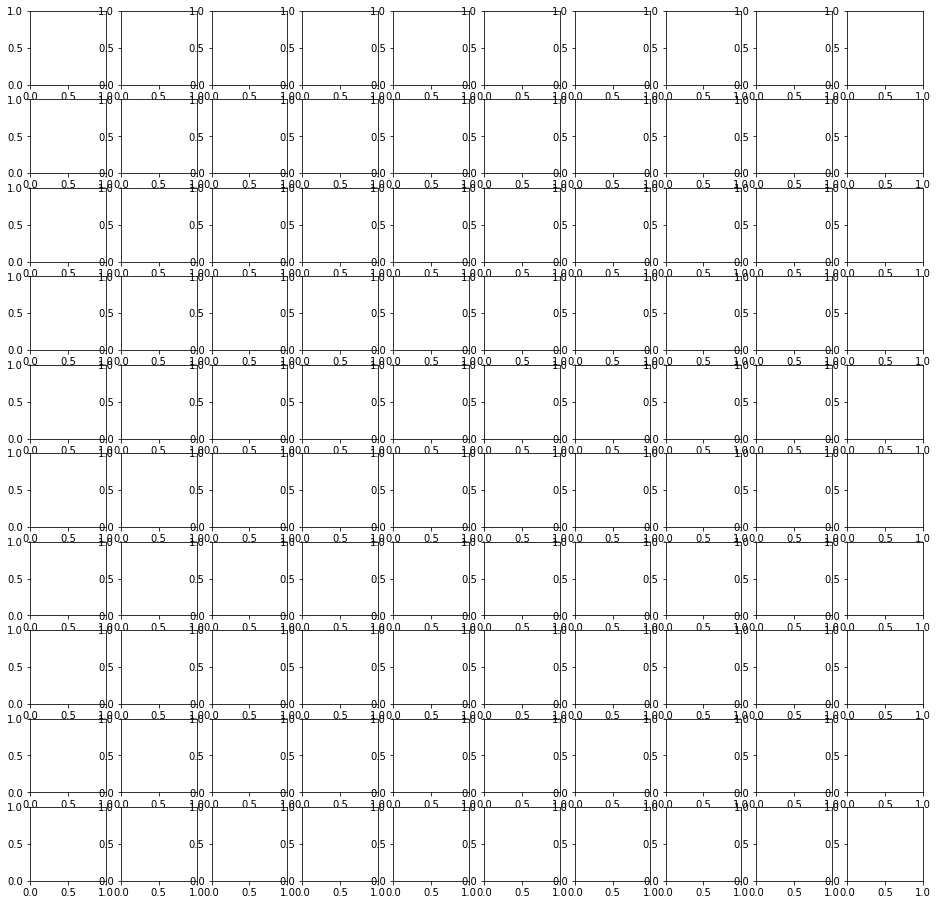

In [99]:
fig, axs = plt.subplots(10,10, figsize = (16,16))
for station, ax in zip(random_list, axs.flat):
    df_week.groupby(['stationCode', 'hour']).mean().loc[station,:].plot(ax=ax, title = str(station), legend = None)
fig.tight_layout()

In [87]:
df = df.set_index(['datetime', 'stationCode']).droplevel(0)

In [90]:
df.index.unique()

Int64Index([16107, 11104,  9020, 12109,  5001, 14014, 17026, 10013,  8026,
            14111,
            ...
            34012, 26009, 17126, 32012, 34005, 22507, 21514, 23204, 31301,
            31303],
           dtype='int64', name='stationCode', length=1437)

In [111]:
df.query('stationCode in (np.random.choice(df.stationCode.unique(), 100))')

UndefinedVariableError: name 'np' is not defined

In [126]:

stations_random = np.random.choice(df.stationCode.unique(), 100)
df = df[df.stationCode.isin(stations_random)]
df = df[df.datetime.dt.weekday <5] # jours de la semaine
df['hour'] = df.datetime.dt.hour # colonne heure
df = df.groupby(['stationCode', 'hour']).mean()

In [129]:
df.droplevel(1).index

Int64Index([ 1012,  1012,  1012,  1012,  1012,  1012,  1012,  1012,  1012,
             1012,
            ...
            92007, 92007, 92007, 92007, 92007, 92007, 92007, 92007, 92007,
            92007],
           dtype='int64', name='stationCode', length=2376)

In [130]:
df

meca      elec       park
stationCode hour                               
1012        0     3.888889  0.111111  15.777778
            1     4.200000  0.200000  15.400000
            2     3.900000  0.300000  15.600000
            3     3.900000  0.400000  15.500000
            4     4.000000  0.400000  15.400000
...                    ...       ...        ...
92007       19    2.000000  0.666667  17.916667
            20    1.750000  1.416667  17.083333
            21    1.666667  1.916667  16.500000
            22    1.916667  1.833333  16.416667
            23    1.909091  2.363636  15.909091

[2376 rows x 3 columns]

In [5]:
df = df.copy()
df = df[df.datetime.dt.weekday <5] # jours de la semaine
df['hour'] = df.datetime.dt.hour # colonne heure
df = df.groupby(['stationCode', 'hour']).mean()
for station in df.index.droplevel(1).unique():
    df.loc[station,"amplitude"] = df.loc[station,:].max().meca - df.loc[station,:].min().meca 
df.sort_values(by = ["amplitude", "hour", "stationCode"], inplace = True, ascending = False)


def display(self = df):
    df = self.copy()
#     np.random.seed(0)
#     stations_random = np.random.choice(df.stationCode.unique(), 100, replace = False)
#     df = df[df.stationCode.isin(stations_random)]
    df = df[df.datetime.dt.weekday <5] # jours de la semaine
    df['hour'] = df.datetime.dt.hour # colonne heure
    
    fig, axs = plt.subplots(10,10, figsize = (16,16))
    df = df.groupby(['stationCode', 'hour']).mean()
    for station in df.index.droplevel(1).unique():
        df.loc[station,"amplitude"] = df.loc[station,:].max().meca - df.loc[station,:].min().meca 
    df.sort_values(by = ["amplitude", "hour", "stationCode"], inplace = True, ascending = False)
    print(df)

    for station, ax in zip(df.index.droplevel(1).unique(),axs.flat):
        ax.plot(df.loc[station, 'meca'], 'green', df.loc[station, 'park'], 'purple')
        ax.set_title(str(station), y = -0.2)
#         df.loc[station,['meca', 'park']].plot(ax=ax, title = str(station), legend = None)
        ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
        ax.set_axis_off()
        ax.set_ylim([0,65])
    fig.tight_layout()
# display()

In [6]:
df.index.droplevel(1).unique()

Int64Index([ 8004, 15012,  1013, 12105, 21306, 15038, 13050, 13055,  7003,
             9024,
            ...
            10202, 10042,  8116,  8104,  7113,  7112,  7110,  4111,  4006,
             1122],
           dtype='int64', name='stationCode', length=1437)

In [7]:
higher_ampl_list = df.index.droplevel(1).unique()[:100].tolist()

In [8]:
df_high = df.loc[higher_ampl_list,:]

In [9]:
df_type1 = df.query('delta >= 20').index.droplevel(1).unique().tolist()
df_type2 = df.query('delta < -20').index.droplevel(1).unique().tolist()

UndefinedVariableError: name 'delta' is not defined

In [106]:
df_type3 = df.query('10 <= delta < 20').index.droplevel(1).unique().tolist()
df_type4 = df.query('-20<= delta < -10').index.droplevel(1).unique().tolist()

UndefinedVariableError: name 'delta' is not defined

In [118]:
len(df_type2)

22

In [119]:
for station in higher_ampl_list:
    df.loc[station,"delta"] = df.loc[(station,12),'meca']-df.loc[(station,0),'meca'] 

In [1]:
map_ = StationMap()

NameError: name 'StationMap' is not defined

In [123]:
map_.marker(*df_type1, color = "red" )
map_.marker(*df_type2, color = "green" )
map_.marker(*df_type3, color = "orange" )
map_.marker(*df_type4, color = "blue" )

In [124]:
map_.show()

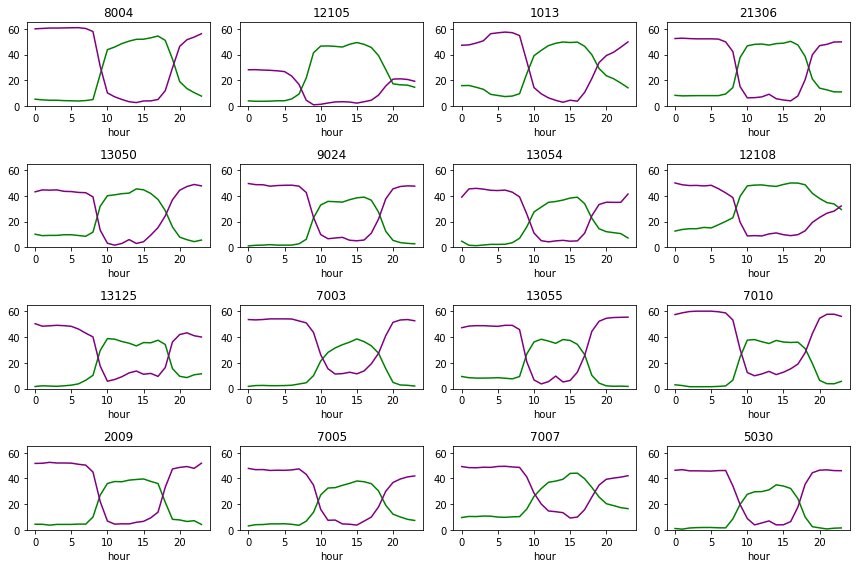

In [105]:
fig, axs = plt.subplots(4,4, figsize = (12,8))
for station, ax in zip(df_type1, axs.flat):
    df.groupby(['stationCode', 'hour']).mean().loc[station,["meca","park"]].plot(ax=ax, title = str(station), legend = None, color = ['green', 'purple'])
    ax.set_ylim({0,65})
fig.tight_layout()

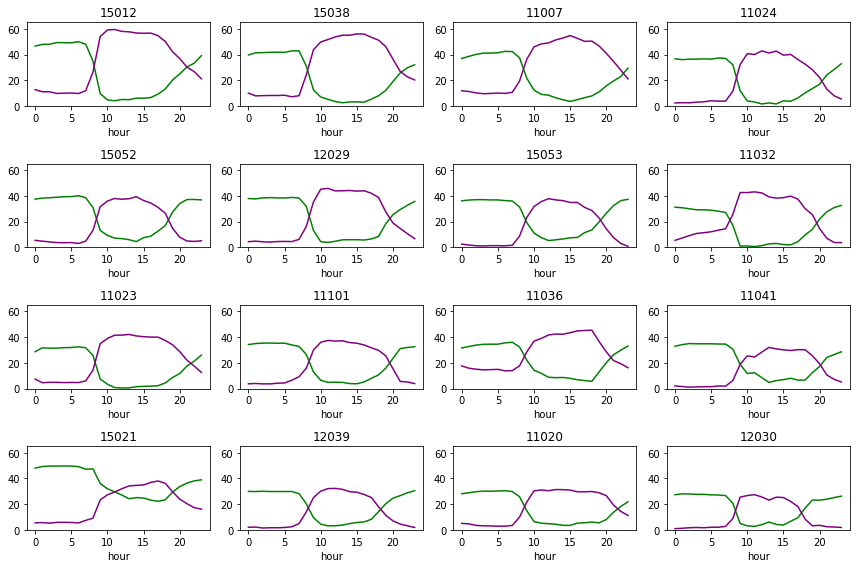

In [106]:
fig, axs = plt.subplots(4,4, figsize = (12,8))
for station, ax in zip(df_type2, axs.flat):
    df.groupby(['stationCode', 'hour']).mean().loc[station,["meca","park"]].plot(ax=ax, title = str(station), legend = None, color = ['green', 'purple'])
    ax.set_ylim({0,65})
fig.tight_layout()

In [108]:
import dotsi

params_dotsi = dotsi.Dict(params)

In [111]:
params_dotsi.meca.title

'Vélos mécaniques'